<a href="https://colab.research.google.com/github/hdorazi/english-phonetics/blob/main/class-2024-fall_1010-0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git

Cloning into 'Harry-Potter-Text-Mining'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 106 (from 1)
Receiving objects: 100% (109/109), 13.39 MiB | 12.65 MiB/s, done.
Resolving deltas: 100% (32/32), done.


### Import Data

In [2]:
import pandas as pd #Importing Pandas package
%cd /content/Harry-Potter-Text-Mining/Book Text

import glob
fns = glob.glob('*.txt')
df = pd.DataFrame()
for fn in fns:
  dftmp = pd.read_csv(fn, sep="@")
  df = pd.concat([df, dftmp])

%cd /content

/content/Harry-Potter-Text-Mining/Book Text
/content


### Import NLTK and Its Text Analysis Components

In [3]:
import nltk #Import NLTK library
nltk.download('stopwords')
nltk.download('punkt') #installed punkt to fix error
from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

import string #Punctuation

# Function for removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Creating Analysis Fields - Word Count and Word Clouds

In order to do an appropriate analysis, punctuation is removed and case is lowered.

For the word cloud analysis specifically, stop words are removed ("The", "And", "So", etc.)

In [4]:
df['WordCountText']=df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
# Word Count
df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords]) # Word Cloud Text #lambda: 즉석에서 함수 만들기 / apply 는 input을 하나씩 함수에 넣음 -> 매번 x input이 달라짐
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

df.reset_index()

,index,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
0,0,It was nearing midnight and the Prime Ministe...,1,6,"[it, was, nearing, midnight, and, the, prime, ...","[nearing, midnight, prime, minister, sitting, ...",4901
1,1,Many miles away the chilly mist that had pres...,2,6,"[many, miles, away, the, chilly, mist, that, h...","[many, miles, away, chilly, mist, pressed, pri...",4781
2,2,Harry Potter was snoring loudly. He had been ...,3,6,"[harry, potter, was, snoring, loudly, he, had,...","[harry, potter, snoring, loudly, sitting, chai...",4656
3,3,Despite the fact that he had spent every waki...,4,6,"[despite, the, fact, that, he, had, spent, eve...","[despite, fact, spent, every, waking, moment, ...",5836
4,4,Harry and Dumbledore approached the back door...,5,6,"[harry, and, dumbledore, approached, the, back...","[harry, dumbledore, approached, back, door, bu...",5726
...,...,...,...,...,...,...,...
195,32,Voldemort looked away from Harry and began ...,33,4,"[voldemort, looked, away, from, harry, and, be...","[voldemort, looked, away, harry, began, examin...",4037
196,33,"Wormtail approached Harry, who scrambled to...",34,4,"[wormtail, approached, harry, who, scrambled, ...","[wormtail, approached, harry, scrambled, find,...",2912
197,34,Harry felt himself slam flat into the groun...,35,4,"[harry, felt, himself, slam, flat, into, the, ...","[harry, felt, slam, flat, ground, face, presse...",5946
198,35,Dumbledore stood up. He stared down at Bar...,36,4,"[dumbledore, stood, up, he, stared, down, at, ...","[dumbledore, stood, stared, barty, crouch, mom...",6199


In [ ]:
df.head(5) #Look at top 5 rows - Make sure everything looks appropriate

,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
0,"The two men appeared out of nowhere, a few yar...",1,7,"[the, two, men, appeared, out, of, nowhere, a,...","[two, men, appeared, nowhere, yards, apart, na...",3025
1,Harry was bleeding. Clutching his right hand i...,2,7,"[harry, was, bleeding, clutching, his, right, ...","[harry, bleeding, clutching, right, hand, left...",4018
2,The sound of the front door slamming echoed up...,3,7,"[the, sound, of, the, front, door, slamming, e...","[sound, front, door, slamming, echoed, stairs,...",3222
3,"Harry ran back upstairs to his bedroom, arrivi...",4,7,"[harry, ran, back, upstairs, to, his, bedroom,...","[harry, ran, back, upstairs, bedroom, arriving...",5235
4,Hagrid?\Harry struggled to raise himself out o...,5,7,"[hagridharry, struggled, to, raise, himself, o...","[hagridharry, struggled, raise, debris, metal,...",5686


### Word Count Graphs

In [5]:
#Import packages
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Set defaults for graph formats
plt.rcParams['figure.figsize']=(15,10) #Sets default for the size of the graph
matplotlib.rcParams['axes.titlesize']=24 #Sets default for the size of the title
matplotlib.rcParams['axes.labelsize']=20 #Sets default for the size of the x/y axis labels

Number of Words in Each Harry Potter Book

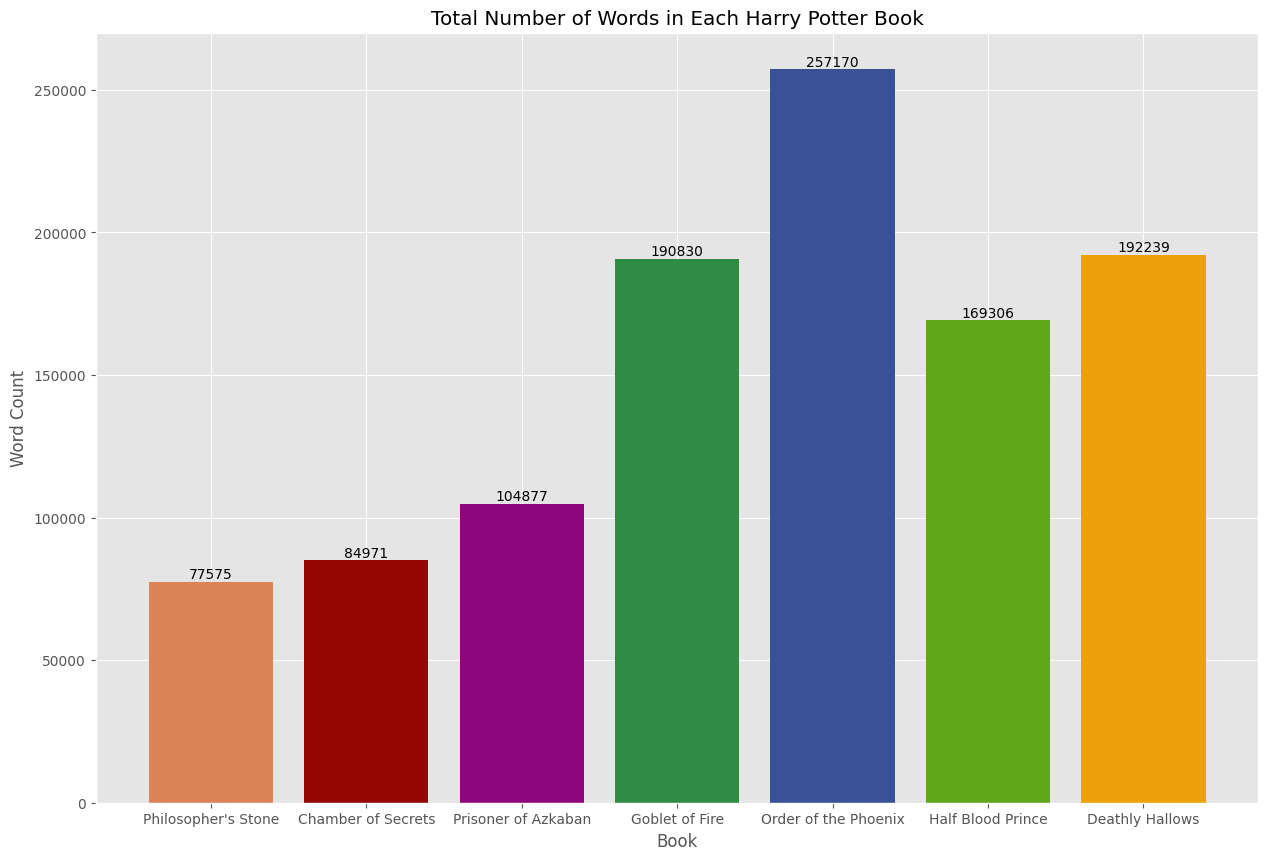

In [6]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].sum().reset_index()['Book'] # sum : total sum
y = df.groupby(['Book'])['WordCount'].sum().reset_index()['WordCount']
x_pos = np.arange(len(x))
plt.style.use('ggplot')
barchart=plt.bar(x_pos, y, color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'])
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Total Number of Words in Each Harry Potter Book")
plt.xticks(x_pos, BookTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')



Average Number of Words Per Chapter of Harry Potter

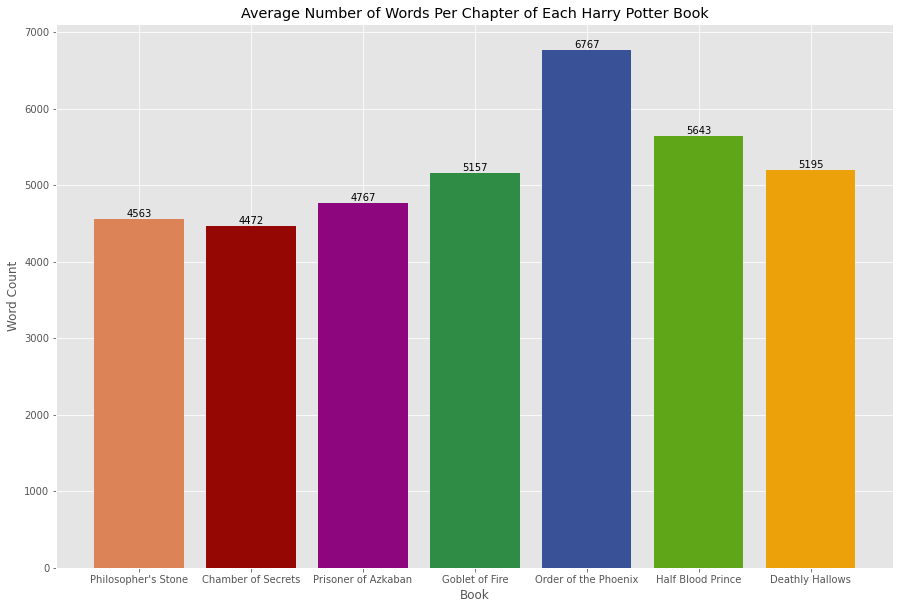

In [ ]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].mean().reset_index()['Book'] # mean : average
y = df.groupby(['Book'])['WordCount'].mean().reset_index()['WordCount']
x_pos = np.arange(len(x))
plt.style.use('ggplot')
barchart=plt.bar(x_pos, y, color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'])
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Average Number of Words Per Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')


Shortest Chapter of Each Harry Potter Book

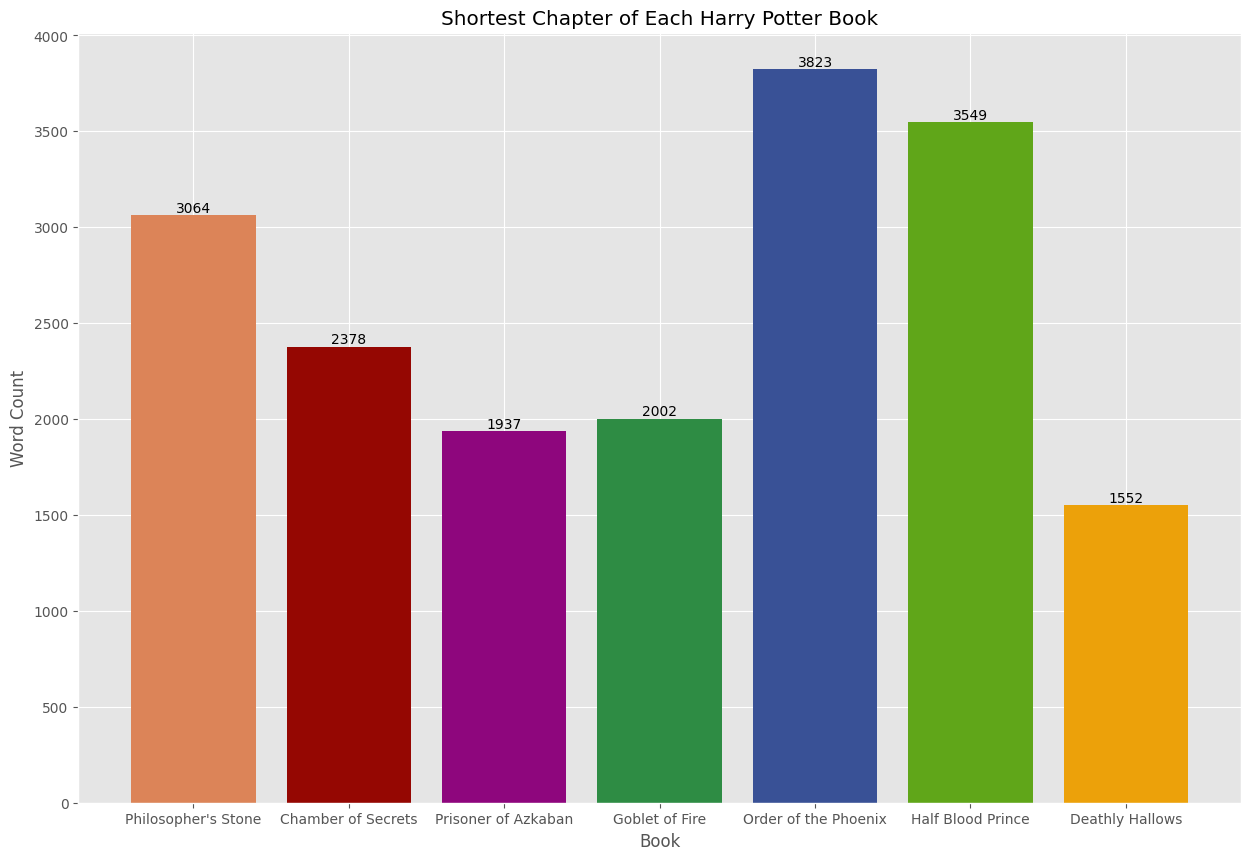

In [7]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].min().reset_index()['Book'] # min: shortest
y = df.groupby(['Book'])['WordCount'].min().reset_index()['WordCount']
x_pos = np.arange(len(x))
plt.style.use('ggplot')
barchart=plt.bar(x_pos, y, color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'])
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Shortest Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')


Longest Chapter of Each Harry Potter Book

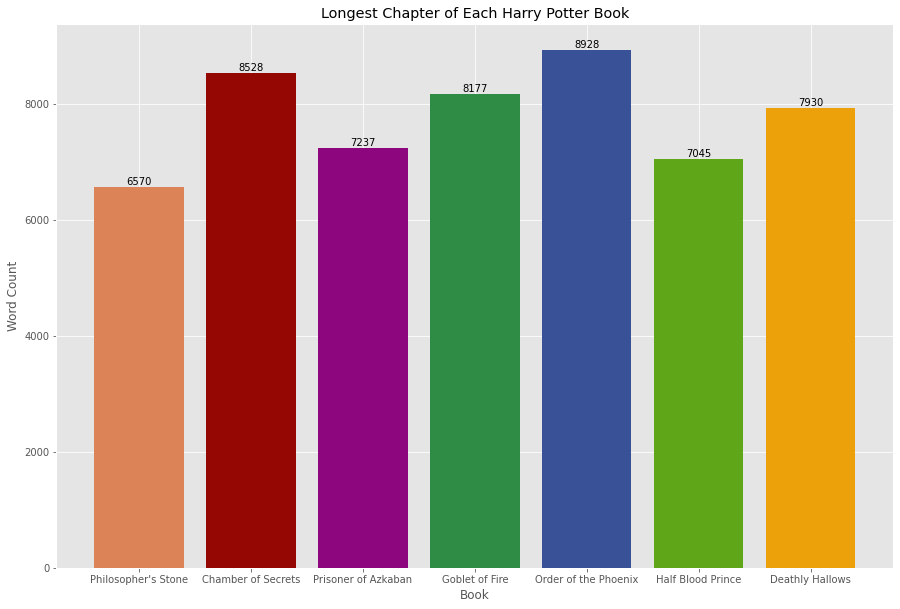

In [ ]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].max().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].max().reset_index()['WordCount']
x_pos = np.arange(len(x))
plt.style.use('ggplot')
barchart=plt.bar(x_pos, y, color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'])
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Longest Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')


Which chapter was the shortest?

In [8]:
one = df.groupby(['Book'])['WordCount'].min().reset_index()['Book']
two = df.groupby(['Book'])['WordCount'].min().reset_index()['WordCount']

#del MinChaps

MinChaps=pd.DataFrame()

for (a, b) in zip(one, two):
     MinChaps = pd.concat([MinChaps, df[(df.WordCount == b) & (df.Book == a)]])

MinChaps

,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
7,"THE POTIONS MASTER There, look.\ \""Where?\"" ...",8,1,"[the, potions, master, there, look, where, nex...","[potions, master, look, next, tall, kid, red, ...",3064
13,"still, heart-shaped confetti was falling from ...",14,2,"[still, heartshaped, confetti, was, falling, f...","[still, heartshaped, confetti, falling, pale, ...",2378
19,THE DEMENTOR'S KISS Harry had never been pa...,20,3,"[the, dementors, kiss, harry, had, never, been...","[dementors, kiss, harry, never, part, stranger...",1937
31,Harry felt his feet slam into the ground; h...,32,4,"[harry, felt, his, feet, slam, into, the, grou...","[harry, felt, feet, slam, ground, injured, leg...",2002
35,The Only OneHe Ever Feared'He hasn't gone!' Ha...,36,5,"[the, only, onehe, ever, fearedhe, hasnt, gone...","[onehe, ever, fearedhe, gone, harry, yelled, b...",3823
27,Harry felt as though he too were hurtling thr...,28,6,"[harry, felt, as, though, he, too, were, hurtl...","[harry, felt, though, hurtling, space, happene...",3549
36,Autumn seemed to arrive suddenly that year. Th...,37,7,"[autumn, seemed, to, arrive, suddenly, that, y...","[autumn, seemed, arrive, suddenly, year, morni...",1552


Which chapter was the longest?

In [ ]:
one = df.groupby(['Book'])['WordCount'].max().reset_index()['Book']
two = df.groupby(['Book'])['WordCount'].max().reset_index()['WordCount']

#del MaxChaps

MaxChaps=pd.DataFrame()

for (a, b) in zip(one, two):
     MaxChaps = pd.concat([MaxChaps, df[(df.WordCount == b) & (df.Book == a)]])

MaxChaps

,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
4,DIAGON ALLEY Harry woke early the next mornin...,5,1,"[diagon, alley, harry, woke, early, the, next,...","[diagon, alley, harry, woke, early, next, morn...",6570
18,"\What d'you mean, I won't be -?\"" \""I've wa...",19,2,"[what, dyou, mean, i, wont, be, ive, waited, a...","[dyou, mean, ive, waited, long, time, harry, p...",8528
20,HERMIONE'S SECRET Shocking business... shoc...,21,3,"[hermiones, secret, shocking, business, shocki...","[hermiones, secret, shocking, business, shocki...",7237
22,Despite the very heavy load of homework tha...,23,4,"[despite, the, very, heavy, load, of, homework...","[despite, heavy, load, homework, fourth, years...",8177
12,Dentention with DeloresDinner in the Great Hal...,13,5,"[dentention, with, deloresdinner, in, the, gre...","[dentention, deloresdinner, great, hall, night...",8928
17,The next day Harry confided in both Ron and H...,18,6,"[the, next, day, harry, confided, in, both, ro...","[next, day, harry, confided, ron, hermione, ta...",7045
32,"Harry remained kneeling at Snape's side, simpl...",33,7,"[harry, remained, kneeling, at, snapes, side, ...","[harry, remained, kneeling, snapes, side, simp...",7930


### Save copy of df - For Word Cloud, Sentiment Analysis

In [10]:
df.to_excel("./df.xlsx", index=False)